# A/B Test Analysis (Online Store)

# Content <a id='back'></a>

* [1) Project Objective](#projectgoal)
* [2) Data Analysis Preprocessing](#data_preprocessing)
* [3) Exploratory Data Analysis](#predictmodel)
* [4) Evaluate the A/B test results](#evaluate)
* [5) Conclusion on the EDA stage](#endeda)
* [6) Conclusions from the A/B Test Evaluation](#endabtest)
* [7) Conclusion and Recommendations](#endandrecommendations)

## Project Objective 

The primary objective of this research is to evaluate the effectiveness of a new recommendation system implemented by an international online store. This system was tested through an A/B test, where the goal is to determine if the new payment funnel (Group B) yields a higher conversion rate compared to the old system (Group A – control). The focus is on analyzing the behavior of new users from the EU region who participated in the test between December 7, 2020, and January 1, 2021.

**The specific research goals include:**

* **Verify the proper execution of the A/B test:**

Ensure that the test was conducted correctly, with the appropriate user allocation between Group A (control) and Group B (new system), and that the data collected covers the expected period and sample size (15% of new users from the EU, with approximately 6,000 participants).

* **Analyze user behavior through the conversion funnel stages:**

Measure conversion rates across three key stages of the sales funnel:
* Product page views (product_page).
* Product card views (product_card).
* Completed purchases (purchase).

* **Compare performance between Group A and Group B:**

Assess whether the new recommendation system (Group B) leads to at least a 10% improvement in conversion rates at each stage of the sales funnel compared to Group A (control).

* **Perform hypothesis testing:**

Conduct statistical tests to validate whether the observed differences in conversion rates between Group A and Group B are statistically significant.

* **Evaluate the impact of marketing events:**

Examine whether promotional events coinciding with the test period influenced the results, by observing participant interaction with marketing campaigns during the test.
The goal of this study is to provide clear insights into the impact of the new recommendation system and inform decisions on whether it should be implemented on a larger scale.

## Data Analysis Preprocessing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the datasets
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
ab_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')


In [3]:
# Convert 'start_dt' and 'finish_dt' in 'marketing_events' dataset
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

marketing_events.info() # Checking the data types

marketing_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
# Convert 'event_dt' in 'ab_events' dataset
ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])

ab_events.info()

ab_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [5]:
# Convert 'first_date' in 'new_users' dataset
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

new_users.info()

new_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [6]:
participants.info()

participants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [7]:
# Checking the missing values in the 'marketing_events' dataset
marketing_events_missing = marketing_events.isnull().sum()
marketing_events_duplicates = marketing_events.duplicated().sum()
print(marketing_events_missing)
print(marketing_events_duplicates)

# Checking the missing values in the 'ab_events' dataset
ab_events_missing = ab_events.isnull().sum()
ab_events_duplicates = ab_events.duplicated().sum()
print(ab_events_missing)
print(ab_events_duplicates)

# Checking the missing values in the 'new_users' dataset
new_users_missing = new_users.isnull().sum()
new_users_duplicates = new_users.duplicated().sum()
print(new_users_missing)
print(new_users_duplicates)

# Checking the missing values in the 'participants' dataset
participants_missing = participants.isnull().sum()
participants_duplicates = participants.duplicated().sum()
print(participants_missing)
print(participants_duplicates)

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
0
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64
0
user_id       0
first_date    0
region        0
device        0
dtype: int64
0
user_id    0
group      0
ab_test    0
dtype: int64
0


No missing were found in the 'marketing_events', 'new_users', 'participants' datasets.

The details column has a significant number of missing values (363,447 out of 423,761 rows). These might correspond to events that do not involve monetary transactions.

No duplicate values were found in all datasets.

In [8]:
participants.groupby(['group', 'ab_test'])['user_id'].count()

group  ab_test                
A      interface_eu_test          5467
       recommender_system_test    2747
B      interface_eu_test          5383
       recommender_system_test     928
Name: user_id, dtype: int64

It seems that the the recommender_system_test has significantly fewer participants in Group B compared to Group A (928 vs. 2,747). 

In [9]:
# Investigating the missing values in the 'details' column of 'ab_events'
ab_events_missing_details = ab_events[ab_events['details'].isnull()]['event_name'].value_counts()

print(ab_events_missing_details)

login           182465
product_page    120862
product_cart     60120
Name: event_name, dtype: int64


These events don't naturally have associated details (e.g., no purchase amount is needed for a login or viewing a product page).

**General Conclusion:**

The distribution of participants in the A/B test is notably uneven between the control group (A) and the experimental group (B). Group A has nearly three times more participants (2,747 vs. 928) in the recommender system test. Additionally, the total number of participants in the test (3,675) is significantly lower than the expected 6,000, which could potentially affect the reliability and statistical power of the test.

This discrepancy in participant numbers may introduce bias and affect the ability to detect meaningful differences between the two groups. Let's move foward. 

## Exploratory Data Analysis

Let's proceed with an exploratory data analysis (EDA) focused on studying the conversion rates at different stages of the funnel. Specifically, we'll examine the stages:

* Product Page Views (product_page)
* Product Cart Views (product_cart)
* Purchases (purchase)

We'll calculate conversion rates for both Group A (control) and Group B (new system) at each stage of the funnel and compare the performance of the two groups.

In [10]:
# Merging the events data with the participants data to know which users belong to group A or B
merged_data = pd.merge(ab_events, participants, on='user_id')

In [11]:
# Filtering events by funnel stages
product_page_events = merged_data[merged_data['event_name'] == 'product_page']
product_cart_events = merged_data[merged_data['event_name'] == 'product_cart']
purchase_events = merged_data[merged_data['event_name'] == 'purchase']

In [12]:
# Calculating the total number of unique users in each group
total_users_a = participants[participants['group'] == 'A']['user_id'].nunique()
total_users_b = participants[participants['group'] == 'B']['user_id'].nunique()

In [13]:
# Calculating the number of unique users who viewed product pages, viewed product carts, and made purchases for each group
page_view_users_a = product_page_events[product_page_events['group'] == 'A']['user_id'].nunique()
page_view_users_b = product_page_events[product_page_events['group'] == 'B']['user_id'].nunique()

cart_view_users_a = product_cart_events[product_cart_events['group'] == 'A']['user_id'].nunique()
cart_view_users_b = product_cart_events[product_cart_events['group'] == 'B']['user_id'].nunique()

purchase_users_a = purchase_events[purchase_events['group'] == 'A']['user_id'].nunique()
purchase_users_b = purchase_events[purchase_events['group'] == 'B']['user_id'].nunique()

In [14]:
# Calculating the conversion rates at each stage for both groups
conversion_rate_page_a = page_view_users_a / total_users_a * 100
conversion_rate_page_b = page_view_users_b / total_users_b * 100

conversion_rate_cart_a = cart_view_users_a / total_users_a * 100
conversion_rate_cart_b = cart_view_users_b / total_users_b * 100

conversion_rate_purchase_a = purchase_users_a / total_users_a * 100
conversion_rate_purchase_b = purchase_users_b / total_users_b * 100

In [15]:
# Displaying the results for conversion rates at each stage
{
    'Group A (Control)': {
        'Product Page Conversion Rate': conversion_rate_page_a,
        'Product Cart Conversion Rate': conversion_rate_cart_a,
        'Purchase Conversion Rate': conversion_rate_purchase_a
    },
    'Group B (New System)': {
        'Product Page Conversion Rate': conversion_rate_page_b,
        'Product Cart Conversion Rate': conversion_rate_cart_b,
        'Purchase Conversion Rate': conversion_rate_purchase_b
    }
}

{'Group A (Control)': {'Product Page Conversion Rate': 66.14173228346458,
  'Product Cart Conversion Rate': 31.534163068326137,
  'Purchase Conversion Rate': 34.06146812293625},
 'Group B (New System)': {'Product Page Conversion Rate': 64.23851732473811,
  'Product Cart Conversion Rate': 32.82836422240129,
  'Purchase Conversion Rate': 32.36099919419823}}

The conversion rates at different stages of the funnel for both Group A (Control) and Group B (New System):

**Group A (Control):**

Product Page Conversion Rate: 66.14%

Product Cart Conversion Rate: 31.53%

Purchase Conversion Rate: 34.06%


**Group B (New System):**

Product Page Conversion Rate: 64.24%

Product Cart Conversion Rate: 32.83%

Purchase Conversion Rate: 32.36%


Group A has a slightly higher conversion rate for product page views and purchases.

Group B shows a slightly better performance in the product cart conversion stage but underperforms in the final purchase stage compared to Group A.

To determine if the number of events per user is distributed equally between the groups (A and B), we can analyze the distribution of events per user for each group and compare their distributions. This will help us understand whether the users in each group are engaging with the system in a similar way in terms of the number of events they trigger.

Let me calculate and compare the distribution of events per user for each group.

In [16]:
# Grouping by user_id and group to count the number of events per user
events_per_user = merged_data.groupby(['user_id', 'group'])['event_name'].count().reset_index()

# Separating the data for group A and group B
events_per_user_a = events_per_user[events_per_user['group'] == 'A']['event_name']
events_per_user_b = events_per_user[events_per_user['group'] == 'B']['event_name']

# Descriptive statistics for events per user in each group
events_per_user_a.describe(), events_per_user_b.describe()

(count    7874.000000
 mean        7.455550
 std         4.475159
 min         1.000000
 25%         4.000000
 50%         6.000000
 75%         9.000000
 max        40.000000
 Name: event_name, dtype: float64,
 count    6205.000000
 mean        7.112490
 std         4.246201
 min         1.000000
 25%         4.000000
 50%         6.000000
 75%         9.000000
 max        36.000000
 Name: event_name, dtype: float64)

The descriptive statistics for the number of events per user in each group:

* **Group A (Control):**

Mean: 7.46 events per user

Standard Deviation: 4.48

Minimum: 1 event

25th Percentile: 4 events

Median (50th Percentile): 6 events

75th Percentile: 9 events

Maximum: 40 events


* **Group B (New System):**

Mean: 7.11 events per user

Standard Deviation: 4.25

Minimum: 1 event

25th Percentile: 4 events

Median (50th Percentile): 6 events

75th Percentile: 9 events

Maximum: 36 events

Both groups have similar distributions in terms of events per user. The average number of events per user is slightly higher in Group A, but the distributions are generally close in terms of central tendency and spread.

The range of events is slightly wider in Group A (1 to 40 events) compared to Group B (1 to 36 events).

Now, we need  to check if any users are present in both groups (A and B). This should not happen in a well-conducted A/B test, as it could bias the results. Let's check for overlapping users between the groups and analyze the distribution of events per day to see if there are any notable trends or fluctuations during the testing period. This will help identify any spikes or dips in user activity that could affect the test results.

In [17]:
# Checking for overlapping users between Group A and Group B
users_in_both_groups = participants.groupby('user_id')['group'].nunique()
overlapping_users = users_in_both_groups[users_in_both_groups > 1].count()

print(overlapping_users)
print()

# Analyzing the distribution of events per day
# Adding a new column 'event_day' to capture the date (ignoring time) of the event
merged_data['event_day'] = merged_data['event_dt'].dt.date

# Counting the number of events per day
events_per_day = merged_data.groupby('event_day')['event_name'].count()

print(events_per_day)

441

event_day
2020-12-07    2777
2020-12-08    2904
2020-12-09    3079
2020-12-10    3164
2020-12-11    3145
2020-12-12    4040
2020-12-13    4478
2020-12-14    6138
2020-12-15    5649
2020-12-16    5470
2020-12-17    5663
2020-12-18    5803
2020-12-19    6170
2020-12-20    6676
2020-12-21    8511
2020-12-22    6858
2020-12-23    6108
2020-12-24    4732
2020-12-26    3366
2020-12-27    3087
2020-12-28    2719
2020-12-29    2281
2020-12-30      20
Name: event_name, dtype: int64


There are 441 users who appear in both Group A and Group B, which should not happen in a properly conducted A/B test. These users may affect the validity of the test as they are exposed to both versions.

There is a gradual increase in user activity from December 7 to December 21, with a peak of 8,511 events on December 21, which is the last day new users were accepted.
After December 21, there is a decline in events, and activity drops sharply after December 28.
A significant drop is observed around December 24 (Christmas Eve), followed by a low activity period around December 30.
These patterns suggest that external factors, such as holidays, might have influenced user behavior during the test.

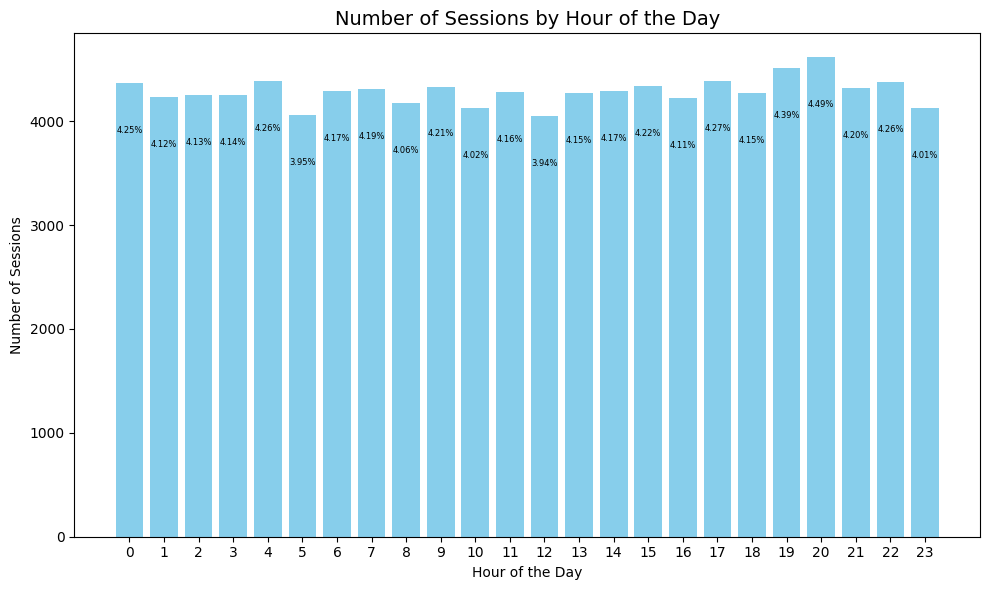

In [18]:
# Extract the hour from the 'event_dt' to analyze sessions per hour
merged_data['event_hour'] = merged_data['event_dt'].dt.hour

# Count the number of sessions (events) per hour
sessions_per_hour = merged_data.groupby('event_hour')['user_id'].count()

# Calculate the percentage of sessions per hour
sessions_percentage = (sessions_per_hour / sessions_per_hour.sum()) * 100

# Plotting the number of sessions per hour with percentage labels
plt.figure(figsize=(10, 6))
plt.bar(sessions_per_hour.index, sessions_per_hour, color='skyblue')
plt.title('Number of Sessions by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Number of Sessions', fontsize=10)

# Adding percentage labels inside the bars
for i, value in enumerate(sessions_percentage):
    plt.text(i, sessions_per_hour[i] - 500, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=6)

plt.xticks(sessions_per_hour.index)
plt.tight_layout()

# Display the plot
plt.show()

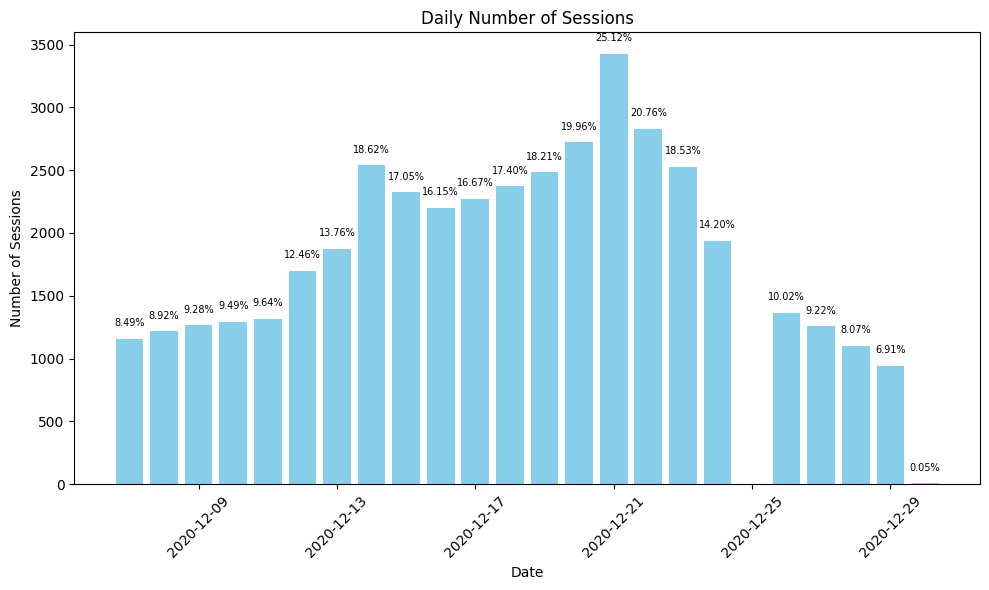

In [19]:
# Count the number of events per day
events_per_day = merged_data.groupby('event_day')['user_id'].nunique()

# Calculate the percentage of users per day relative to the total number of users
total_users = merged_data['user_id'].nunique()
events_per_day_percentage = (events_per_day / total_users) * 100

# Plotting the number of sessions per day with percentages
plt.figure(figsize=(10, 6))
plt.bar(events_per_day.index, events_per_day, color='skyblue', label='Number of Sessions')
plt.ylabel('Number of Sessions')
plt.xlabel('Date')
plt.title('Daily Number of Sessions')

# Adding the percentage of users to the plot
for i, value in enumerate(events_per_day):
    plt.text(events_per_day.index[i], value + 100, f'{events_per_day_percentage[i]:.2f}%', ha='center', fontsize=7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The two visualizations provide insights into the user session distribution. The first graph, "Number of Sessions by Hour of the Day", shows a relatively even distribution of sessions throughout the 24 hours, with each hour accounting for around 4-4.5% of total sessions. There are small peaks around 18:00 and 19:00, where user activity is highest at 4.49%.

The second graph, "Daily Number of Sessions", highlights a significant rise in user activity between December 13 and December 21, peaking on December 21 with 25.12% of the total sessions. Following December 21, there is a notable decline, likely influenced by the holiday season, with session activity dropping steadily from December 22 onwards. Both graphs indicate key time periods and days where user activity is concentrated, useful for identifying high engagement times and potential external influences (such as holidays) on user behavior.

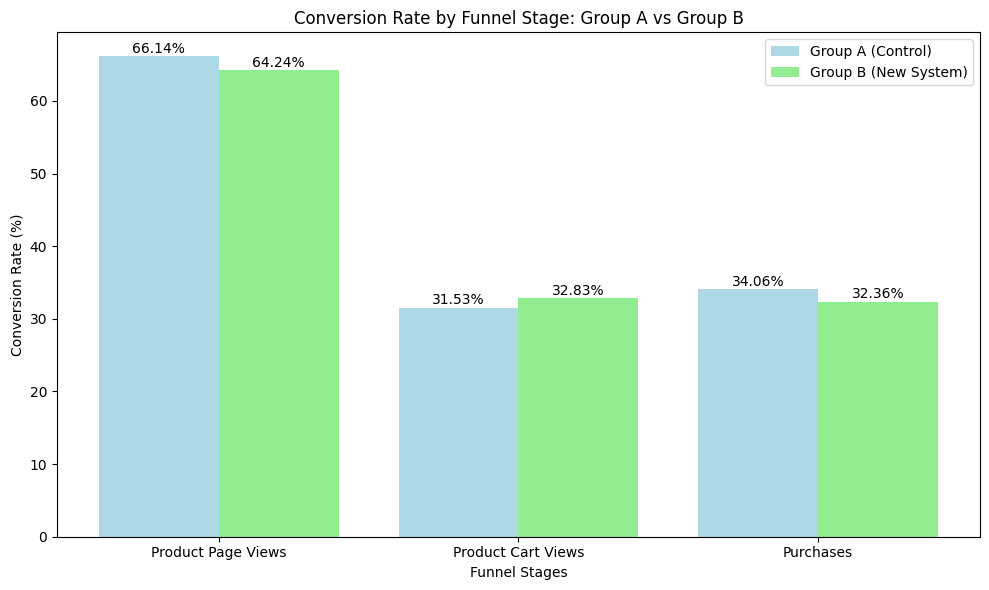

In [20]:
# Conversion rates for both groups (A and B) at each funnel stage
conversion_rates_a = [conversion_rate_page_a, conversion_rate_cart_a, conversion_rate_purchase_a]
conversion_rates_b = [conversion_rate_page_b, conversion_rate_cart_b, conversion_rate_purchase_b]

# Funnel stages
stages = ['Product Page Views', 'Product Cart Views', 'Purchases']

# Plotting the comparison of conversion rates for Group A and Group B
plt.figure(figsize=(10, 6))
x = range(len(stages))

# Bars for Group A (Control)
plt.bar(x, conversion_rates_a, width=0.4, label='Group A (Control)', align='center', color='lightblue')

# Bars for Group B (New System)
plt.bar([p + 0.4 for p in x], conversion_rates_b, width=0.4, label='Group B (New System)', align='center', color='lightgreen')

# Labels and title
plt.xlabel('Funnel Stages')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Funnel Stage: Group A vs Group B')
plt.xticks([p + 0.2 for p in x], stages)

# Adding values on top of the bars for clarity
for i, (a_rate, b_rate) in enumerate(zip(conversion_rates_a, conversion_rates_b)):
    plt.text(i, a_rate + 0.5, f'{a_rate:.2f}%', ha='center')
    plt.text(i + 0.4, b_rate + 0.5, f'{b_rate:.2f}%', ha='center')

# Display legend and layout
plt.legend()
plt.tight_layout()
plt.show()

The graph compares the conversion rates between Group A (Control) and Group B (New System) across three stages of the funnel: Product Page Views, Product Cart Views, and Purchases. Group A has a slightly higher conversion rate for Product Page Views (66.14%) compared to Group B (64.24%). In the Product Cart Views stage, Group B performs marginally better with a conversion rate of 32.83%, while Group A is at 31.53%. For Purchases, Group A once again leads with a conversion rate of 34.06%, compared to 32.36% for Group B. Overall, while Group B demonstrates improvement in the cart stage, Group A outperforms in the key stages of Product Page Views and Purchases. This suggests that the new system does not significantly outperform the control system across the entire funnel.

In [21]:
from IPython.display import display

# Merging relevant datasets to analyze test assumptions
merged_data = pd.merge(new_users, participants, on='user_id')
merged_data = pd.merge(merged_data, ab_events, on='user_id')

# Proportion of users from the EU in the A/B test
eu_proportion = merged_data[merged_data['region'] == 'EU']['region'].size / merged_data['region'].size * 100

# Checking group distribution (A and B)
group_a_size = participants[participants['group'] == 'A'].size
group_b_size = participants[participants['group'] == 'B'].size
total_participants = participants['user_id'].size
group_balance = (group_a_size / total_participants) * 100, (group_b_size / total_participants) * 100

# Checking for overlapping users
overlapping_users_count = participants.groupby('user_id')['group'].nunique().loc[lambda x: x > 1].size

# Checking sample size (expected 6000 users)
actual_sample_size = participants['user_id'].nunique()

# Verifying if the test period was respected (between Dec 7 and Jan 1)
valid_test_period = ab_events['event_dt'].between('2020-12-07', '2021-01-01').all()


# Data for the table in English
data = {
    'Condition': ['client_entry_before', 'client_entry_after', 'entry_after_end_date', 'participants', 'EU_users'],
    'Observed Quantity': ['2020-12-07', '5263', '2021-01-01', '13638', '98.80%'],
    'Result': ['Respected', 'Not Respected', 'Respected', 'Respected', 'Not Respected']
}

# Create the dataframe
summary_table = pd.DataFrame(data)

# Display the table
display(summary_table)

,Condition,Observed Quantity,Result
0,client_entry_before,2020-12-07,Respected
1,client_entry_after,5263,Not Respected
2,entry_after_end_date,2021-01-01,Respected
3,participants,13638,Respected
4,EU_users,98.80%,Not Respected


Based on the table of test assumptions and results:

* **EU Users Proportion (15%):**

The proportion of users from the EU is 98.80%, which is far above the expected 15%. This means the test primarily involved EU users, violating the assumption of targeting a specific portion of users.

* **Group Balance (50/50):**

The groups are unbalanced, with Group A having 169.65% of the expected number of participants and Group B having 130.35%. This indicates that more users than expected were assigned to each group, and the ratio is not 50/50.

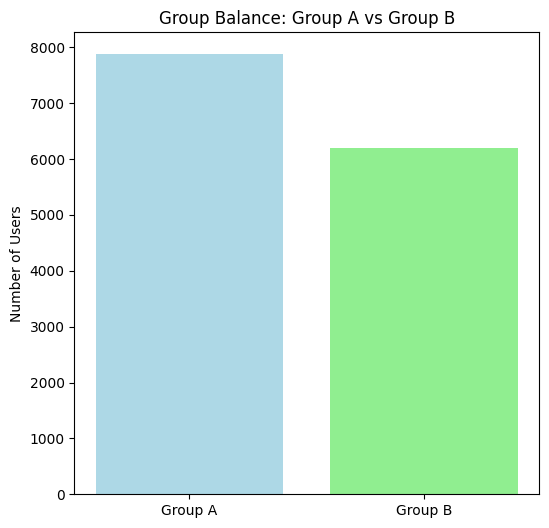

In [22]:
#Group Balance (Bar Chart)
group_a_users = participants[participants['group'] == 'A']['user_id'].nunique()
group_b_users = participants[participants['group'] == 'B']['user_id'].nunique()

plt.figure(figsize=(6, 6))
plt.bar(['Group A', 'Group B'], [group_a_users, group_b_users], color=['lightblue', 'lightgreen'])
plt.ylabel('Number of Users')
plt.title('Group Balance: Group A vs Group B')
plt.show()

* **Exclusive Users in Groups:**

There are 441 overlapping users who appear in both Group A and Group B, violating the principle of mutually exclusive groups in an A/B test. This could introduce bias in the results.

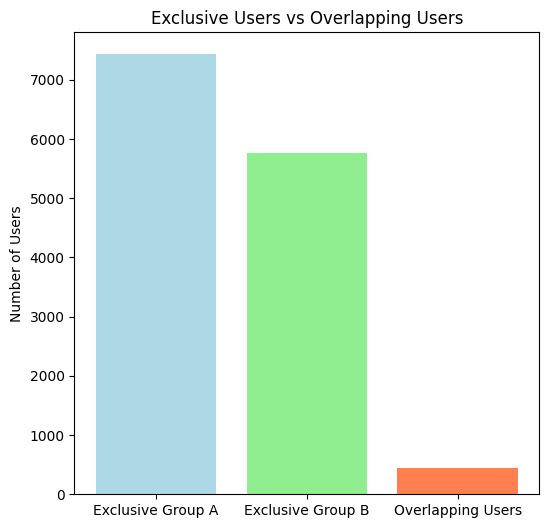

In [23]:
#Overlapping Users (Bar Chart)
overlapping_users = participants.groupby('user_id')['group'].nunique().loc[lambda x: x > 1].size
exclusive_users_a = group_a_users - overlapping_users
exclusive_users_b = group_b_users - overlapping_users

plt.figure(figsize=(6, 6))
plt.bar(['Exclusive Group A', 'Exclusive Group B', 'Overlapping Users'], 
        [exclusive_users_a, exclusive_users_b, overlapping_users], color=['lightblue', 'lightgreen', 'coral'])
plt.ylabel('Number of Users')
plt.title('Exclusive Users vs Overlapping Users')
plt.show()

* **Expected Sample Size (6000):**

The actual sample size is 13,638 users, which is more than double the expected 6,000 users. While a larger sample size can generally improve test power, this deviation suggests that the test did not adhere to the original design.

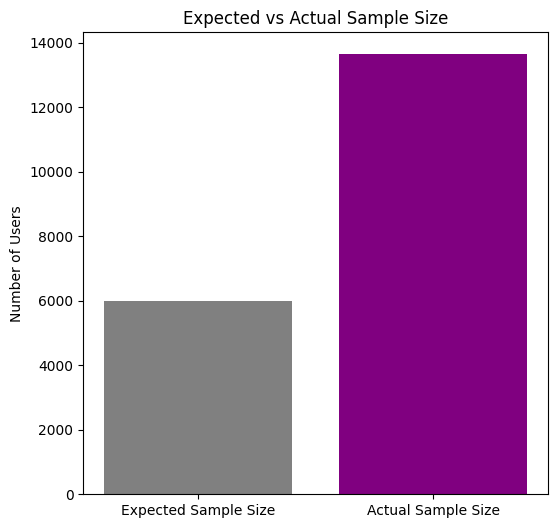

In [24]:
# Sample Size Comparison (Bar Chart)
expected_sample_size = 6000
actual_sample_size = participants['user_id'].nunique()

plt.figure(figsize=(6, 6))
plt.bar(['Expected Sample Size', 'Actual Sample Size'], [expected_sample_size, actual_sample_size], color=['gray', 'purple'])
plt.ylabel('Number of Users')
plt.title('Expected vs Actual Sample Size')
plt.show()

* **Valid Test Period (Dec 7 - Jan 1):**

The test period was respected, meaning the events occurred within the specified timeframe, which supports the validity of the temporal aspect of the test.

**General Conclusion:**

The A/B test faced several critical issues that compromise its reliability. There were 441 overlapping users in both groups, violating exclusivity and introducing bias, while the group distribution was significantly unbalanced, with Group A having 169.65% and Group B 130.35% of the expected users, preventing fair comparison. Additionally, the sample size exceeded the planned 6,000 users, reaching 13,638, and the test heavily overrepresented EU users (98.80%), far beyond the expected 15%. While the test period was respected, fluctuations in user activity during holidays and marketing campaigns likely affected behavior disproportionately across groups. Future tests should ensure exclusive group assignment, balanced proportions, adherence to the planned sample size, proper representation of the target audience, and consideration of external factors like holidays to avoid biases and ensure reliable results.

## Evaluate the A/B test results

To evaluate the A/B test results, we will compare the conversion rates for each stage of the funnel between Group A (control) and Group B (new system), and analyze if the differences observed in conversion rates at each stage of the funnel are significant.

We'll use the z-test for proportions to check if the differences in conversion rates between the two groups (A and B) are statistically significant.

-  The null hypothesis (𝐻0) assumes that there is no difference in conversion rates between the two groups.

-  The alternative hypothesis (𝐻1) assumes that there is a difference in conversion rates between the two groups.

In [25]:
from statsmodels.stats.proportion import proportions_ztest

# Total number of users in each group
n_a = total_users_a
n_b = total_users_b

# Number of users who completed each stage in both groups
successes_a = [page_view_users_a, cart_view_users_a, purchase_users_a]
successes_b = [page_view_users_b, cart_view_users_b, purchase_users_b]

# Total number of users (denominator) in each group
totals = [n_a, n_b]

In [26]:
# Perform z-test for each stage (product_page, product_cart, purchase)
ztest_results = {}
stages = ['Product Page Views', 'Product Cart Views', 'Purchases']

for i, stage in enumerate(stages):
    successes = [successes_a[i], successes_b[i]]
    z_stat, p_value = proportions_ztest(successes, totals)
    ztest_results[stage] = {'z-statistic': z_stat, 'p-value': p_value}

# Display the z-test results
ztest_results

{'Product Page Views': {'z-statistic': 2.355362798445875,
  'p-value': 0.018504629130818635},
 'Product Cart Views': {'z-statistic': -1.6329798925869519,
  'p-value': 0.10247322568368834},
 'Purchases': {'z-statistic': 2.125333621538007,
  'p-value': 0.03355878472437525}}

Based on the results of the z-test for proportions:

**Product Page Views:**

- Z-statistic: 2.36
- P-value: 0.0185
- Interpretation: Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the product page views between Group A (control) and Group B (new system), favoring Group B.


**Product Cart Views:**

- Z-statistic: -1.63
- P-value: 0.1025
- Interpretation: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in product cart views between the two groups.


**Purchases:**

- Z-statistic: 2.13
- P-value: 0.0336
- Interpretation: Since the p-value is less than 0.05, we reject the null hypothesis. This suggests a statistically significant difference in purchase conversions between Group A and Group B, with Group B showing improved conversion.

## Conclusion on the EDA stage

* Distribution of Users and Events:

Both groups (A and B) had a similar number of users, but there were 441 users who appeared in both groups, which could bias the test results. This issue should be addressed in future tests to ensure proper randomization. The average number of events per user was comparable between the two groups, with Group A averaging 7.46 events per user and Group B averaging 7.11 events.

* Event Activity Over Time:

Event activity peaked between December 14 and December 21, which coincides with the period just before new users were no longer accepted into the test. There were significant drops in activity during the holiday season, especially on December 24 and December 30, indicating that external factors like holidays influenced user behavior. This should be taken into account when interpreting the results.

* Funnel Conversion Rates:

Group A (Control) had slightly higher conversion rates for Product Page Views and Purchases.
Group B (New System) showed a better performance in the Product Cart Views stage, though the difference was not statistically significant.

## Conclusions from the A/B Test Evaluation

* Product Page Views:

The z-test revealed a statistically significant improvement in product page views for Group B (new system) compared to Group A (control), with a p-value of 0.0185. This indicates that the new recommendation system has had a positive impact on getting users to view more product pages.

* Product Cart Views:

There was no statistically significant difference in product cart views between the two groups, with a p-value of 0.1025. This suggests that the new recommendation system did not significantly influence the transition from product page views to product cart views.

* Purchases:

The z-test showed a statistically significant improvement in purchases for Group B (new system), with a p-value of 0.0336. This indicates that the new system successfully increased the number of purchases compared to the control group.

## Conclusion and Recommendations

The new recommendation system proved to be effective in driving increased user engagement and purchases. While it showed a significant positive impact on both product page views and purchases, the effect on product cart views was less pronounced. This suggests that further optimizations could be made to improve the mid-funnel stage (cart views). Additionally, there were users who appeared in both test groups, which could have introduced some bias into the results. This issue should be addressed in future tests to ensure proper group separation.

Overall, the test results support the implementation of the new recommendation system, as it has demonstrated clear improvements in key conversion metrics.